In [6]:
import numpy as np
from online_cp import ConformalRidgeRegressor

cp = ConformalRidgeRegressor()

In [7]:
N = 150
mu0 = 0
mu1 = 0.1
X0 = np.random.uniform(0, 1, (N, 2))
y0 = X0.sum(axis=1) + np.random.normal(mu0, 0.1, N) # Gaussian noise wiht zero mean and variance 0.1
X1 = np.random.uniform(0, 1, (N, 2))
y1 = X1.sum(axis=1) + np.random.normal(mu1, 0.1, N) # Gaussian noise wiht 0.1 mean and variance 0.1

X = np.vstack([X0, X1])
y = np.hstack([y0, y1])

In [8]:
from online_cp import ConformalRidgeRegressor
from online_cp import PluginMartingale

ridge_a = 1
cp = ConformalRidgeRegressor(a=ridge_a)

martingale = PluginMartingale()

p_values = []
martingale_values = []

for i, (obj, lab) in enumerate(zip(X, y)):
    p = cp.compute_p_value(obj, lab)
    p_values.append(p)
    cp.learn_one(obj, lab)
    martingale.update_martingale_value(p)
    martingale_values.append(martingale.logM)

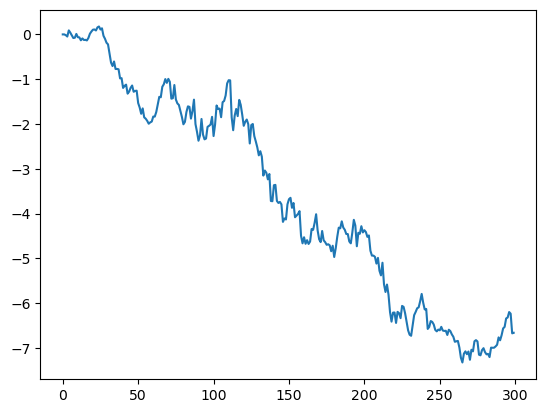

In [9]:
import matplotlib.pyplot as plt
plt.plot(martingale_values)

In [10]:
from online_cp.regressors import KernelConformalRidgeRegressor
from online_cp.kernels import LinearKernel, GaussianKernel
from online_cp import PluginMartingale

ker = GaussianKernel(1)

kernel_a = 1
cp = KernelConformalRidgeRegressor(a=kernel_a, kernel=ker)

martingale = PluginMartingale()

p_values = []
martingale_values_kernel = []

for i, (obj, lab) in enumerate(zip(X, y)):
    p = cp.compute_p_value(obj, lab)
    p_values.append(p)
    cp.learn_one(obj, lab)
    martingale.update_martingale_value(p)
    martingale_values_kernel.append(martingale.logM)

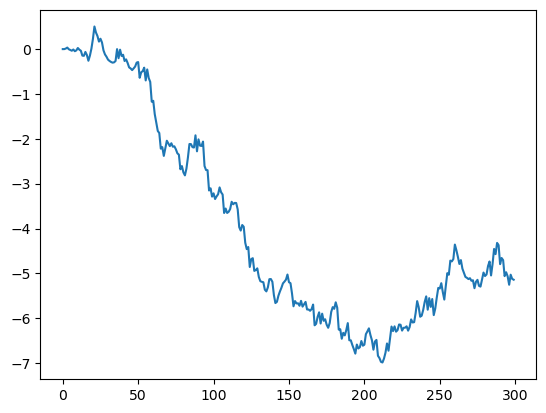

In [11]:
import matplotlib.pyplot as plt
plt.plot(martingale_values_kernel)

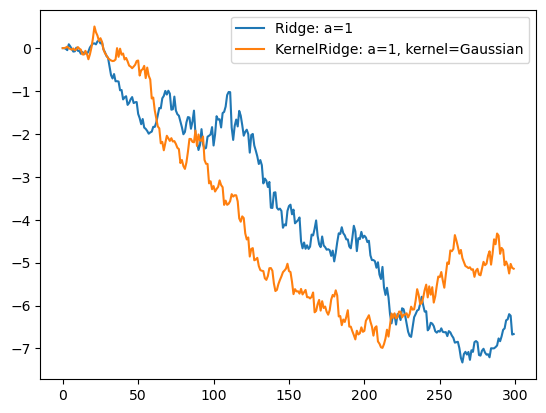

In [12]:
plt.plot(martingale_values, label=f'Ridge: a={ridge_a}')
plt.plot(martingale_values_kernel, label=f'KernelRidge: a={kernel_a}, kernel={ker.name}')
plt.legend()